In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    auc,
    roc_curve,
    precision_score,
    average_precision_score,
    recall_score,
    roc_auc_score,
    brier_score_loss,
    precision_recall_curve,
    precision_score,
)
import os
import sys
import pprint
import warnings
import textwrap
import kfre
import sklearn
import kfre
from kfre import *
import jinja2
import xlsxwriter

In [2]:
print("Python version:")
print(sys.version)
print()
print(f"Pandas Version = {pd.__version__}")
print(f"Seaborn Version = {sns.__version__}")
print(f"Numpy Version = {np.__version__}")
print(f"Scikit-Learn Version = {sklearn.__version__}")
print(f"KFRE Version = {kfre.__version__}")
print(f"Jinja2 Version = {jinja2.__version__}")
print(f"xlsxwriter Version = {xlsxwriter.__version__}")
# print(f"itertools Version = {itertools.__version__}")

import tqdm

print(f"matplotlib Version = {matplotlib.__version__}")
print(f"tqdm Version = {tqdm.__version__}")

Python version:
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]

Pandas Version = 1.3.5
Seaborn Version = 0.12.2
Numpy Version = 1.21.6
Scikit-Learn Version = 1.0.2
KFRE Version = 0.1.8a4
Jinja2 Version = 3.1.4
xlsxwriter Version = 3.2.0
matplotlib Version = 3.5.3
tqdm Version = 4.48.0


In [3]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# apartment_for_rent_classified = fetch_ucirepo(id=555)

# # data (as pandas dataframes)
# X = apartment_for_rent_classified.data.features
# y = apartment_for_rent_classified.data.targets

# # metadata
# # print(apartment_for_rent_classified.metadata)

# # variable information
# # print(apartment_for_rent_classified.variables)

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# # metadata
# print(census_income.metadata)

# # variable information
# print(census_income.variables)

In [5]:
import eda_toolkit
import os

In [6]:
base_path = os.path.join(os.pardir)

# Go up one level from 'notebooks' to the parent directory, then into the 'data' folder
data_path = os.path.join(os.pardir, "data")
data_output = os.path.join(os.pardir, "data_output")

image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure the 'data' directory exists
eda_toolkit.ensure_directory(data_path)
eda_toolkit.ensure_directory(data_output)
eda_toolkit.ensure_directory(image_path_png)
eda_toolkit.ensure_directory(image_path_svg)

Directory exists: ..\data
Directory exists: ..\data_output
Directory exists: ..\images\png_images
Directory exists: ..\images\svg_images


In [7]:
df = X.join(y)

In [8]:
import random

In [9]:
from eda_toolkit import add_ids

In [10]:
def add_ids(
    df,
    id_colname="ID",
    num_digits=9,
    seed=None,
    set_as_index=False,
):
    """
    Add a column of unique IDs with a specified number of digits to the dataframe.

    This function sets a random seed and then generates a unique ID with the
    specified number of digits for each row in the dataframe. The new IDs are
    added as a new column with the specified column name, which can be placed as
    the first column in the dataframe if set_as_index is True.

    Args:
        df (pd.DataFrame): The dataframe to add IDs to.
        id_colname (str): The name of the new column for the IDs.
        num_digits (int): The number of digits for the unique IDs.
        seed (int, optional): The seed for the random number generator.
        Defaults to None.
        set_as_index (bool, optional): Whether to set the new ID column as the
        index. Defaults to True.

    Returns:
        pd.DataFrame: The updated dataframe with the new ID column.
    """
    # Check for unique indices
    if df.index.duplicated().any():
        print("Warning: DataFrame index is not unique.")
        print(
            "Duplicate index entries:",
            df.index[df.index.duplicated()].tolist(),
        )
    else:
        print("DataFrame index is unique.")

    random.seed(seed)

    # Ensure the first digit is non-zero
    def generate_id():
        first_digit = random.choice("123456789")
        other_digits = "".join(random.choices("0123456789", k=num_digits - 1))
        return first_digit + other_digits

    # Generate a set of unique IDs
    ids = set()
    while len(ids) < len(df):
        new_ids = {generate_id() for _ in range(len(df) - len(ids))}
        ids.update(new_ids)

    # Convert the set of unique IDs to a list
    ids = list(ids)

    # Create a new column in df for these IDs
    df[id_colname] = ids

    if set_as_index:
        # Optionally set the new ID column as the index
        df = df.set_index(id_colname)
    else:
        # Ensure the new ID column is the first column
        columns = [id_colname] + [col for col in df.columns if col != id_colname]
        df = df[columns]

    return df

In [11]:
df = add_ids(
    df=df,
    id_colname="census_id",
    num_digits=8,
    seed=111,
    set_as_index=True,
)

DataFrame index is unique.


In [12]:
# df.to_csv(os.path.join(data_path, "df.csv"))

In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
census_id,,,,,,,,,,,,,,,
71841434,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
46506962,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
92306006,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
18765207,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
87688857,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.head().iloc[:, :8]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
census_id,,,,,,,,
71841434,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
46506962,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
92306006,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
18765207,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
87688857,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


In [15]:
# create age bins so that the ages can be categorized
bin_ages = [
    0,
    18,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    float("inf"),
]

label_ages = [
    "< 18",
    "18-29",
    "30-39",
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100 +",
]

# categorize the ages and assign to new var
df["age_group"] = pd.cut(
    df["age"],
    bins=bin_ages,
    labels=label_ages,
    right=False,
)

In [16]:
from eda_toolkit import parse_date_with_rule

In [17]:
date_strings = ["31/12/2021", "01/01/2022", "12/31/2021"]

# Standardize the date strings
standardized_dates = [parse_date_with_rule(date) for date in date_strings]

print(standardized_dates)

['2021-12-31', '2022-01-01', '2021-12-31']


In [18]:
# # Creating the DataFrame
# data = {
#     "date_column": [
#         "31/12/2021",
#         "01/01/2022",
#         "12/31/2021",
#         "13/02/2022",
#         "07/04/2022",
#     ],
#     "name": ["Alice", "Bob", "Charlie", "David", "Eve"],
#     "amount": [100.0, 150.5, 200.75, 250.25, 300.0],
# }

# df = pd.DataFrame(data)

# # Apply the function to the DataFrame column
# df["standardized_date"] = df["date_column"].apply(parse_date_with_rule)

# print(df)

In [19]:
from eda_toolkit import dataframe_columns

In [20]:
dataframe_columns(df=df)

Shape:  (48842, 16) 

Total seconds of processing time: 0.324131


,column,dtype,null_total,null_pct,unique_values_total,max_unique_value,max_unique_value_total,max_unique_value_pct
0,age,int64,0,0.00,74,36,1348,2.76
1,workclass,object,963,1.97,9,Private,33906,69.42
2,fnlwgt,int64,0,0.00,28523,203488,21,0.04
3,education,object,0,0.00,16,HS-grad,15784,32.32
4,education-num,int64,0,0.00,16,9,15784,32.32
5,marital-status,object,0,0.00,7,Married-civ-spouse,22379,45.82
6,occupation,object,966,1.98,15,Prof-specialty,6172,12.64
7,relationship,object,0,0.00,6,Husband,19716,40.37
8,race,object,0,0.00,5,White,41762,85.50
9,sex,object,0,0.00,2,Male,32650,66.85


In [21]:
# import pandas as pd


# def make_unique(df):
#     """
#     Ensure unique columns and index in the DataFrame.

#     Parameters:
#     -----------
#     df : pandas.DataFrame
#         The DataFrame to be processed.

#     Returns:
#     --------
#     pandas.DataFrame
#         The DataFrame with unique columns and index.
#     """
#     # Ensure unique columns
#     columns = pd.Series(df.columns)
#     for dup in columns[columns.duplicated()].unique():
#         columns[columns[columns == dup].index] = [
#             f"{dup}_{i}" if i != 0 else dup for i in range(sum(columns == dup))
#         ]
#     df.columns = columns

#     # Ensure unique index
#     if not df.index.is_unique:
#         df.index = [f"{idx}_{i}" if i != 0 else idx for i, idx in enumerate(df.index)]

#     return df


# # Sample DataFrame with potentially non-unique columns or index
# df2 = pd.DataFrame(
#     {
#         "sex": ["M", "F", "M"],
#         "age_group": ["young", "middle-aged", "old"],
#         "income": [50000, 60000, 70000],
#     }
# )
# # Simulate non-unique columns for demonstration purposes
# df2.columns = ["sex", "age_group", "age_group"]

# # Make columns and index unique
# df2 = make_unique(df2)


# # Define the highlight function
# def highlight_columns(df, columns, color="yellow"):
#     """
#     Highlight specific columns in a DataFrame with a specified background color.

#     Parameters:
#     -----------
#     df : pandas.DataFrame
#         The DataFrame to be styled.
#     columns : list of str
#         List of column names to be highlighted.
#     color : str, optional
#         The background color to be applied for highlighting (default is "yellow").

#     Returns:
#     --------
#     pandas.io.formats.style.Styler
#         A Styler object with the specified columns highlighted.
#     """

#     def highlight(s):
#         return [
#             f"background-color: {color}" if col in columns else "" for col in s.index
#         ]

#     return df.style.apply(highlight, subset=columns, axis=1)


# # Correct usage: List of column names as strings
# columns_to_highlight = ["sex", "age_group_1"]

# # Applying the highlight function
# highlighted_df = highlight_columns(df2, columns_to_highlight, color="yellow")
# highlighted_df

In [22]:
def highlight_columns(df, columns, color="yellow"):
    """
    Highlight specific columns in a DataFrame with a specified background color.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to be styled.
    columns : list of str
        List of column names to be highlighted.
    color : str, optional
        The background color to be applied for highlighting (default is "yellow").

    Returns:
    --------
    pandas.io.formats.style.Styler
        A Styler object with the specified columns highlighted.
    """

    def highlight(s):
        return [
            f"background-color: {color}" if col in columns else "" for col in s.index
        ]

    return df.style.apply(highlight, axis=1)

In [23]:
# Applying the highlight function
highlighted_df = highlight_columns(
    df.head(),
    columns=["age", "education"],
    color="#F8C5C8",
)
highlighted_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
census_id,,,,,,,,,,,,,,,,
71841434,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39
46506962,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50-59
92306006,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39
18765207,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-59
87688857,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-29


In [24]:
from eda_toolkit import kde_distributions

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
census_id,,,,,,,,,,,,,,,,
71841434,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39
46506962,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50-59
92306006,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39
18765207,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-59
87688857,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-29


In [26]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# import textwrap
# import os


# def kde_distributions(
#     df,
#     vars_of_interest=None,
#     grid_figsize=(10, 8),  # Size of the overall grid figure
#     single_figsize=(6, 4),  # Size of individual figures
#     kde=True,
#     hist_color="#0000FF",  # Default color blue as hex code
#     kde_color="#FF0000",  # Default color red as hex code
#     hist_edgecolor="#000000",  # Default edge color black as hex code
#     hue=None,  # Added hue parameter
#     fill=True,  # Added fill parameter
#     n_rows=1,
#     n_cols=1,
#     w_pad=1.0,
#     h_pad=1.0,
#     text_wrap=50,
#     image_path_png=None,
#     image_path_svg=None,
#     image_filename=None,
#     bbox_inches=None,
#     single_var_image_path_png=None,
#     single_var_image_path_svg=None,
#     single_var_image_filename=None,
#     y_axis_label="Density",  # Customizable y-axis label
#     plot_type="both",  # Parameter to control the plot type ('hist', 'kde', or 'both')
#     log_scale_vars=None,  # Parameter to specify which variables to apply log scale
#     bins="auto",  # Default to 'auto' as per sns
#     binwidth=None,  # Parameter to control the width of bins
#     stat="density",  # Parameter to control stat ('count', 'density', 'frequency', 'probability', 'proportion', 'percent')
#     label_fontsize=12,  # Font size for axis labels
#     tick_fontsize=10,  # Font size for tick labels
# ):
#     """
#     Generate KDE or histogram distribution plots for specified columns in a DataFrame.

#     Parameters:
#     -----------
#     df : pandas.DataFrame
#         The DataFrame containing the data to plot.

#     vars_of_interest : list of str, optional
#         List of column names for which to generate distribution plots.

#     grid_figsize : tuple, optional (default=(10, 8))
#         Size of the overall grid figure.

#     single_figsize : tuple, optional (default=(6, 4))
#         Size of individual figures.

#     kde : bool, optional (default=True)
#         Whether to include KDE plots on the histograms.

#     hist_color : str, optional (default='#0000FF')
#         Color of the histogram bars.

#     kde_color : str, optional (default='#FF0000')
#         Color of the KDE plot.

#     hist_edgecolor : str, optional (default='#000000')
#         Color of the histogram bar edges.

#     hue : str, optional
#         Column name to group data by.

#     fill : bool, optional (default=True)
#         Whether to fill the histogram bars with color.

#     n_rows : int, optional (default=1)
#         Number of rows in the subplot grid.

#     n_cols : int, optional (default=1)
#         Number of columns in the subplot grid.

#     w_pad : float, optional (default=1.0)
#         Width padding between subplots.

#     h_pad : float, optional (default=1.0)
#         Height padding between subplots.

#     text_wrap : int, optional (default=50)
#         Maximum width of the title text before wrapping.

#     image_path_png : str, optional
#         Directory path to save the PNG image of the overall distribution plots.

#     image_path_svg : str, optional
#         Directory path to save the SVG image of the overall distribution plots.

#     image_filename : str, optional
#         Filename to use when saving the overall distribution plots.

#     bbox_inches : str, optional
#         Bounding box to use when saving the figure. For example, 'tight'.

#     single_var_image_path_png : str, optional
#         Directory path to save the PNG images of the separate distribution plots.

#     single_var_image_path_svg : str, optional
#         Directory path to save the SVG images of the separate distribution plots.

#     single_var_image_filename : str, optional
#         Filename to use when saving the separate distribution plots.
#         The variable name will be appended to this filename.

#     y_axis_label : str, optional (default='Count')
#         Label for the y-axis.

#     plot_type : str, optional (default='both')
#         The type of plot to generate ('hist', 'kde', or 'both').

#     log_scale_vars : list of str, optional
#         List of variable names to apply log scaling.

#     bins : int or sequence, optional (default='auto')
#         Specification of histogram bins.

#     binwidth : number or pair of numbers, optional
#         Width of each bin, overrides bins but can be used with binrange.

#     stat : str, optional (default='density')
#         The type of statistic to display on the y-axis ('count', 'density', 'frequency', 'probability', 'proportion', 'percent').

#     label_fontsize : int, optional (default=12)
#         Font size for axis labels.

#     tick_fontsize : int, optional (default=10)
#         Font size for tick labels.

#     Returns:
#     --------
#     None
#     """

#     valid_stats = [
#         "count",
#         "density",
#         "frequency",
#         "probability",
#         "proportion",
#         "percent",
#     ]

#     if vars_of_interest is None:
#         print("Error: No variables of interest provided.")
#         return

#     plot_type = plot_type.lower()
#     if plot_type not in ["hist", "kde", "both"]:
#         raise ValueError('plot_type can either be "hist", "kde", or "both"')

#     stat = stat.lower()
#     if stat not in valid_stats:
#         raise ValueError(f"stat can either be {', '.join(valid_stats)}")

#     # Warn if stat="count" and kde=True
#     if stat == "count" and kde:
#         warnings.warn("Using KDE with stat='count' may produce misleading plots.")

#     # Check if edgecolor is being set while fill is False
#     if not fill and hist_edgecolor != "#000000":
#         raise ValueError("Cannot change edgecolor when fill is set to False")

#     # Check if all log_scale_vars are in the DataFrame
#     if log_scale_vars:
#         if isinstance(log_scale_vars, str):
#             log_scale_vars = [log_scale_vars]
#         invalid_vars = [var for var in log_scale_vars if var not in df.columns]
#         if invalid_vars:
#             raise ValueError(f"Invalid log_scale_vars: {invalid_vars}")

#     # Warn if both bins and binwidth are specified
#     if bins != "auto" and binwidth is not None:
#         warnings.warn(
#             "Specifying both bins and binwidth may affect performance.", UserWarning
#         )

#     # Create subplots grid
#     fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=grid_figsize)

#     # Flatten the axes array to simplify iteration
#     axes = axes.flatten()

#     # Iterate over the provided column list and corresponding axes
#     for ax, col in zip(axes[: len(vars_of_interest)], vars_of_interest):
#         with warnings.catch_warnings():
#             warnings.simplefilter("ignore", UserWarning)
#             # Wrap the title if it's too long
#             title = f"Distribution of {col}"

#             # Determine if log scale should be applied to this variable
#             log_scale = col in log_scale_vars if log_scale_vars else False

#             # Filter out non-positive values if log_scale is True
#             data = df[df[col] > 0] if log_scale else df

#             if plot_type == "hist":
#                 sns.histplot(
#                     data=data,
#                     x=col,
#                     kde=kde,
#                     ax=ax,
#                     hue=hue,
#                     color=hist_color if hue is None and fill else None,
#                     edgecolor=hist_edgecolor,
#                     stat=stat,
#                     fill=fill,
#                     log_scale=log_scale,
#                     bins=(
#                         bins if binwidth is None else None
#                     ),  # Use bins if binwidth is None
#                     binwidth=binwidth,
#                 )
#                 if kde:
#                     sns.kdeplot(
#                         data=data,
#                         x=col,
#                         ax=ax,
#                         hue=hue,
#                         color=kde_color if hue is None else None,
#                         log_scale=log_scale,
#                     )
#             elif plot_type == "kde":
#                 sns.kdeplot(
#                     data=data,
#                     x=col,
#                     ax=ax,
#                     hue=hue,
#                     color=kde_color,
#                     fill=True,
#                     log_scale=log_scale,
#                 )
#             elif plot_type == "both":
#                 sns.histplot(
#                     data=data,
#                     x=col,
#                     kde=False,
#                     ax=ax,
#                     hue=hue,
#                     color=hist_color if hue is None and fill else None,
#                     edgecolor=hist_edgecolor,
#                     stat=stat,
#                     fill=fill,
#                     log_scale=log_scale,
#                     bins=(
#                         bins if binwidth is None else None
#                     ),  # Use bins if binwidth is None
#                     binwidth=binwidth,
#                 )
#                 if kde:
#                     sns.kdeplot(
#                         data=data,
#                         x=col,
#                         ax=ax,
#                         hue=hue,
#                         color=kde_color if hue is None else None,
#                         log_scale=log_scale,
#                     )

#             ax.set_xlabel(col, fontsize=label_fontsize)
#             ax.set_ylabel(y_axis_label, fontsize=label_fontsize)
#             ax.set_title(
#                 "\n".join(textwrap.wrap(title, width=text_wrap)),
#                 fontsize=label_fontsize,
#             )
#             ax.tick_params(axis="both", which="major", labelsize=tick_fontsize)

#     # Hide any remaining axes
#     for ax in axes[len(vars_of_interest) :]:
#         ax.axis("off")

#     # Adjust layout with specified padding
#     plt.tight_layout(w_pad=w_pad, h_pad=h_pad)

#     # Save files if paths are provided
#     if image_path_png and image_filename:
#         plt.savefig(
#             os.path.join(image_path_png, f"{image_filename}.png"),
#             bbox_inches=bbox_inches,
#         )
#     if image_path_svg and image_filename:
#         plt.savefig(
#             os.path.join(image_path_svg, f"{image_filename}.svg"),
#             bbox_inches=bbox_inches,
#         )
#     plt.show()

#     # Generate separate plots for each variable of interest if provided
#     if vars_of_interest:
#         for var in vars_of_interest:
#             fig, ax = plt.subplots(figsize=single_figsize)
#             with warnings.catch_warnings():
#                 warnings.simplefilter("ignore", UserWarning)
#                 title = f"Distribution of {var}"

#                 # Determine if log scale should be applied to this variable
#                 log_scale = var in log_scale_vars if log_scale_vars else False

#                 # Filter out non-positive values if log_scale is True
#                 data = df[df[var] > 0] if log_scale else df

#                 if plot_type == "hist":
#                     sns.histplot(
#                         data=data,
#                         x=var,
#                         kde=kde,
#                         ax=ax,
#                         hue=hue,
#                         color=hist_color if hue is None and fill else None,
#                         edgecolor=hist_edgecolor,
#                         stat=stat,
#                         fill=fill,
#                         log_scale=log_scale,
#                         bins=(
#                             bins if binwidth is None else None
#                         ),  # Use bins if binwidth is None
#                         binwidth=binwidth,
#                     )
#                     if kde:
#                         sns.kdeplot(
#                             data=data,
#                             x=var,
#                             ax=ax,
#                             hue=hue,
#                             color=kde_color if hue is None else None,
#                             log_scale=log_scale,
#                         )
#                 elif plot_type == "kde":
#                     sns.kdeplot(
#                         data=data,
#                         x=var,
#                         ax=ax,
#                         hue=hue,
#                         color=kde_color,
#                         fill=True,
#                         log_scale=log_scale,
#                     )
#                 elif plot_type == "both":
#                     sns.histplot(
#                         data=data,
#                         x=var,
#                         kde=False,
#                         ax=ax,
#                         hue=hue,
#                         color=hist_color if hue is None and fill else None,
#                         edgecolor=hist_edgecolor,
#                         stat=stat,
#                         fill=fill,
#                         log_scale=log_scale,
#                         bins=(
#                             bins if binwidth is None else None
#                         ),  # Use bins if binwidth is None
#                         binwidth=binwidth,
#                     )
#                     if kde:
#                         sns.kdeplot(
#                             data=data,
#                             x=var,
#                             ax=ax,
#                             hue=hue,
#                             color=kde_color if hue is None else None,
#                             log_scale=log_scale,
#                         )

#                 ax.set_xlabel(var, fontsize=label_fontsize)
#                 ax.set_ylabel(y_axis_label, fontsize=label_fontsize)
#                 ax.set_title(
#                     "\n".join(textwrap.wrap(title, width=text_wrap)),
#                     fontsize=label_fontsize,
#                 )
#                 ax.tick_params(axis="both", which="major", labelsize=tick_fontsize)

#             plt.tight_layout()

#             # Save files for the variable of interest if paths are provided
#             if single_var_image_path_png and single_var_image_filename:
#                 plt.savefig(
#                     os.path.join(
#                         single_var_image_path_png,
#                         f"{single_var_image_filename}_{var}.png",
#                     ),
#                     bbox_inches=bbox_inches,
#                 )
#             if single_var_image_path_svg and single_var_image_filename:
#                 plt.savefig(
#                     os.path.join(
#                         single_var_image_path_svg,
#                         f"{single_var_image_filename}_{var}.svg",
#                     ),
#                     bbox_inches=bbox_inches,
#                 )
#             plt.close(
#                 fig
#             )  # Close the figure after saving to avoid displaying it multiple times

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import textwrap
import os
import matplotlib.ticker as mticker  # Import for formatting


def kde_distributions(
    df,
    vars_of_interest=None,
    grid_figsize=(10, 8),  # Size of the overall grid figure
    single_figsize=(6, 4),  # Size of individual figures
    kde=True,
    hist_color="#0000FF",  # Default color blue as hex code
    kde_color="#FF0000",  # Default color red as hex code
    hist_edgecolor="#000000",  # Default edge color black as hex code
    hue=None,  # Added hue parameter
    fill=True,  # Added fill parameter
    fill_alpha=1,  # Transparency level for the fill
    n_rows=1,
    n_cols=1,
    w_pad=1.0,
    h_pad=1.0,
    text_wrap=50,
    image_path_png=None,
    image_path_svg=None,
    image_filename=None,
    bbox_inches=None,
    single_var_image_path_png=None,
    single_var_image_path_svg=None,
    single_var_image_filename=None,
    y_axis_label="Density",  # Parameter to control y-axis label
    plot_type="both",  # Parameter to control the plot type ('hist', 'kde', or 'both')
    log_scale_vars=None,  # Parameter to specify which variables to apply log scale
    bins="auto",  # Default to 'auto' as per sns
    binwidth=None,  # Parameter to control the width of bins
    label_fontsize=10,  # Fontsize control for labels
    tick_fontsize=10,  # Fontsize control for tick labels
    disable_sci_notation=False,  # Toggle for scientific notation
    stat="density",  # Control the aggregate statistic for histograms
):
    """
    Generate KDE or histogram distribution plots for specified columns in a DataFrame.

    This function provides a flexible way to visualize the distribution of
    data for specified columns in a DataFrame. It supports both kernel density
    estimation (KDE) and histograms, with options to customize various aspects
    of the plots, including colors, labels, binning, and scaling.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.

    vars_of_interest : list of str, optional
        List of column names for which to generate distribution plots.

    grid_figsize : tuple, optional (default=(10, 8))
        Size of the overall grid figure.

    single_figsize : tuple, optional (default=(6, 4))
        Size of individual figures for each variable.

    kde : bool, optional (default=True)
        Whether to include KDE plots on the histograms.

    hist_color : str, optional (default='#0000FF')
        Color of the histogram bars.

    kde_color : str, optional (default='#FF0000')
        Color of the KDE plot.

    hist_edgecolor : str, optional (default='#000000')
        Color of the histogram bar edges.

    hue : str, optional
        Column name to group data by, adding different colors for each group.

    fill : bool, optional (default=True)
        Whether to fill the histogram bars with color.

    fill_alpha : float, optional (default=1)
        Alpha transparency for the fill color of the histogram bars, where
        0 is fully transparent and 1 is fully opaque.

    n_rows : int, optional (default=1)
        Number of rows in the subplot grid.

    n_cols : int, optional (default=1)
        Number of columns in the subplot grid.

    w_pad : float, optional (default=1.0)
        Width padding between subplots.

    h_pad : float, optional (default=1.0)
        Height padding between subplots.

    text_wrap : int, optional (default=50)
        Maximum width of the title text before wrapping.

    image_path_png : str, optional
        Directory path to save the PNG image of the overall distribution plots.

    image_path_svg : str, optional
        Directory path to save the SVG image of the overall distribution plots.

    image_filename : str, optional
        Filename to use when saving the overall distribution plots.

    bbox_inches : str, optional
        Bounding box to use when saving the figure. For example, 'tight'.

    single_var_image_path_png : str, optional
        Directory path to save the PNG images of the separate distribution plots.

    single_var_image_path_svg : str, optional
        Directory path to save the SVG images of the separate distribution plots.

    single_var_image_filename : str, optional
        Filename to use when saving the separate distribution plots.
        The variable name will be appended to this filename.

    y_axis_label : str, optional (default='Density')
        The label to display on the y-axis.

    plot_type : str, optional (default='both')
        The type of plot to generate ('hist', 'kde', or 'both').

    log_scale_vars : list of str, optional
        List of variable names to apply log scaling.

    bins : int or sequence, optional (default='auto')
        Specification of histogram bins.

    binwidth : number or pair of numbers, optional
        Width of each bin, overrides bins but can be used with binrange.

    label_fontsize : int, optional (default=10)
        Font size for axis labels, including xlabel, ylabel, and tick marks.

    disable_sci_notation : bool, optional (default=False)
        Toggle to disable scientific notation on axes.

    stat : str, optional (default='density')
        Aggregate statistic to compute in each bin (e.g., 'count', 'frequency',
        'probability', 'percent', 'density').

    Returns:
    --------
    None
        This function does not return any value but generates and optionally
        saves distribution plots for the specified columns in the DataFrame.
    """

    if vars_of_interest is None:
        print("Error: No variables of interest provided.")
        return

    # Validate stat parameter
    valid_stats = [
        "count",
        "frequency",
        "probability",
        "proportion",
        "percent",
        "density",
    ]
    if stat.lower() not in valid_stats:
        raise ValueError(
            f"Invalid stat value. Expected one of {valid_stats}, "
            f"got '{stat}' instead."
        )

    # Check if all log_scale_vars are in the DataFrame
    if log_scale_vars:
        invalid_vars = [var for var in log_scale_vars if var not in df.columns]
        if invalid_vars:
            raise ValueError(f"Invalid log_scale_vars: {invalid_vars}")

    # Check if edgecolor is being set while fill is False
    if not fill and hist_edgecolor != "#000000":
        raise ValueError("Cannot change edgecolor when fill is set to False")

    # Check if fill_alpha is being set while fill is False
    if not fill and fill_alpha != 0.6:
        raise ValueError("Cannot set fill_alpha when fill is set to False")

    # Warn if both bins and binwidth are set
    if bins != "auto" and binwidth is not None:
        warnings.warn(
            "Specifying both bins and binwidth may affect performance.",
            UserWarning,
        )

    # Create subplots grid
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=grid_figsize)

    # Flatten the axes array to simplify iteration
    axes = axes.flatten()

    # Iterate over the provided column list and corresponding axes
    for ax, col in zip(axes[: len(vars_of_interest)], vars_of_interest):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning)
            # Wrap the title if it's too long
            title = f"Distribution of {col}"

            # Determine if log scale should be applied to this variable
            log_scale = col in log_scale_vars if log_scale_vars else False

            # Filter out non-positive values if log_scale is True
            data = df[df[col] > 0] if log_scale else df

            if plot_type == "hist":
                sns.histplot(
                    data=data,
                    x=col,
                    kde=kde,
                    ax=ax,
                    hue=hue,
                    color=hist_color if hue is None and fill else None,
                    edgecolor=hist_edgecolor,
                    stat=stat.lower(),
                    fill=fill,
                    alpha=fill_alpha,  # Apply the alpha value for transparency
                    log_scale=log_scale,
                    bins=bins,
                    binwidth=binwidth,
                )
                if kde:
                    sns.kdeplot(
                        data=data,
                        x=col,
                        ax=ax,
                        hue=hue,
                        color=kde_color if hue is None else None,
                        log_scale=log_scale,
                    )
            elif plot_type == "kde":
                sns.kdeplot(
                    data=data,
                    x=col,
                    ax=ax,
                    hue=hue,
                    color=kde_color,
                    fill=True,
                    log_scale=log_scale,
                )
            elif plot_type == "both":
                sns.histplot(
                    data=data,
                    x=col,
                    kde=False,
                    ax=ax,
                    hue=hue,
                    color=hist_color if hue is None and fill else None,
                    edgecolor=hist_edgecolor,
                    stat=stat.lower(),
                    fill=fill,
                    alpha=fill_alpha,  # Apply the alpha value for transparency
                    log_scale=log_scale,
                    bins=bins,
                    binwidth=binwidth,
                )
                if kde:
                    sns.kdeplot(
                        data=data,
                        x=col,
                        ax=ax,
                        hue=hue,
                        color=kde_color if hue is None else None,
                        log_scale=log_scale,
                    )

            ax.set_xlabel(col, fontsize=label_fontsize)
            ax.set_ylabel(y_axis_label.capitalize(), fontsize=label_fontsize)
            ax.set_title(
                "\n".join(textwrap.wrap(title, width=text_wrap)),
                fontsize=label_fontsize,
            )
            ax.tick_params(
                axis="both", labelsize=tick_fontsize
            )  # Control tick fontsize separately

            # Disable scientific notation if requested
            if disable_sci_notation:
                ax.xaxis.set_major_formatter(
                    mticker.ScalarFormatter(useMathText=False),
                )
                ax.yaxis.set_major_formatter(
                    mticker.ScalarFormatter(useMathText=False),
                )

    # Hide any remaining axes
    for ax in axes[len(vars_of_interest) :]:
        ax.axis("off")

    # Adjust layout with specified padding
    plt.tight_layout(w_pad=w_pad, h_pad=h_pad)

    # Save files if paths are provided
    if image_path_png and image_filename:
        plt.savefig(
            os.path.join(image_path_png, f"{image_filename}.png"),
            bbox_inches=bbox_inches,
        )
    if image_path_svg and image_filename:
        plt.savefig(
            os.path.join(image_path_svg, f"{image_filename}.svg"),
            bbox_inches=bbox_inches,
        )
    plt.show()

    # Generate separate plots for each variable of interest if provided
    if vars_of_interest:
        for var in vars_of_interest:
            fig, ax = plt.subplots(figsize=single_figsize)
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", UserWarning)
                title = f"Distribution of {var}"

                # Determine if log scale should be applied to this variable
                log_scale = var in log_scale_vars if log_scale_vars else False

                # Filter out non-positive values if log_scale is True
                data = df[df[var] > 0] if log_scale else df

                if plot_type == "hist":
                    sns.histplot(
                        data=data,
                        x=var,
                        kde=kde,
                        ax=ax,
                        hue=hue,
                        color=hist_color if hue is None and fill else None,
                        edgecolor=hist_edgecolor,
                        stat=stat.lower(),
                        fill=fill,
                        alpha=fill_alpha,  # Apply the alpha value for transparency
                        log_scale=log_scale,
                        bins=bins,
                        binwidth=binwidth,
                    )
                    if kde:
                        sns.kdeplot(
                            data=data,
                            x=var,
                            ax=ax,
                            hue=hue,
                            color=kde_color if hue is None else None,
                            log_scale=log_scale,
                        )
                elif plot_type == "kde":
                    sns.kdeplot(
                        data=data,
                        x=var,
                        ax=ax,
                        hue=hue,
                        color=kde_color,
                        fill=True,
                        log_scale=log_scale,
                    )
                elif plot_type == "both":
                    sns.histplot(
                        data=data,
                        x=var,
                        kde=False,
                        ax=ax,
                        hue=hue,
                        color=hist_color if hue is None and fill else None,
                        edgecolor=hist_edgecolor,
                        stat=stat.lower(),
                        fill=fill,
                        alpha=fill_alpha,  # Apply the alpha value for transparency
                        log_scale=log_scale,
                        bins=bins,
                        binwidth=binwidth,
                    )
                    if kde:
                        sns.kdeplot(
                            data=data,
                            x=var,
                            ax=ax,
                            hue=hue,
                            color=kde_color if hue is None else None,
                            log_scale=log_scale,
                        )

                ax.set_xlabel(var, fontsize=label_fontsize)
                ax.set_ylabel(y_axis_label.capitalize(), fontsize=label_fontsize)
                ax.set_title(
                    "\n".join(textwrap.wrap(title, width=text_wrap)),
                    fontsize=label_fontsize,
                )
                ax.tick_params(
                    axis="both", labelsize=tick_fontsize
                )  # Control tick fontsize separately

                # Disable scientific notation if requested
                if disable_sci_notation:
                    ax.xaxis.set_major_formatter(
                        mticker.ScalarFormatter(useMathText=False)
                    )
                    ax.yaxis.set_major_formatter(
                        mticker.ScalarFormatter(useMathText=False)
                    )

            plt.tight_layout()

            # Save files for the variable of interest if paths are provided
            if single_var_image_path_png and single_var_image_filename:
                plt.savefig(
                    os.path.join(
                        single_var_image_path_png,
                        f"{single_var_image_filename}_{var}.png",
                    ),
                    bbox_inches=bbox_inches,
                )
            if single_var_image_path_svg and single_var_image_filename:
                plt.savefig(
                    os.path.join(
                        single_var_image_path_svg,
                        f"{single_var_image_filename}_{var}.svg",
                    ),
                    bbox_inches=bbox_inches,
                )
            plt.close(
                fig
            )  # Close the figure after saving to avoid displaying it multiple times

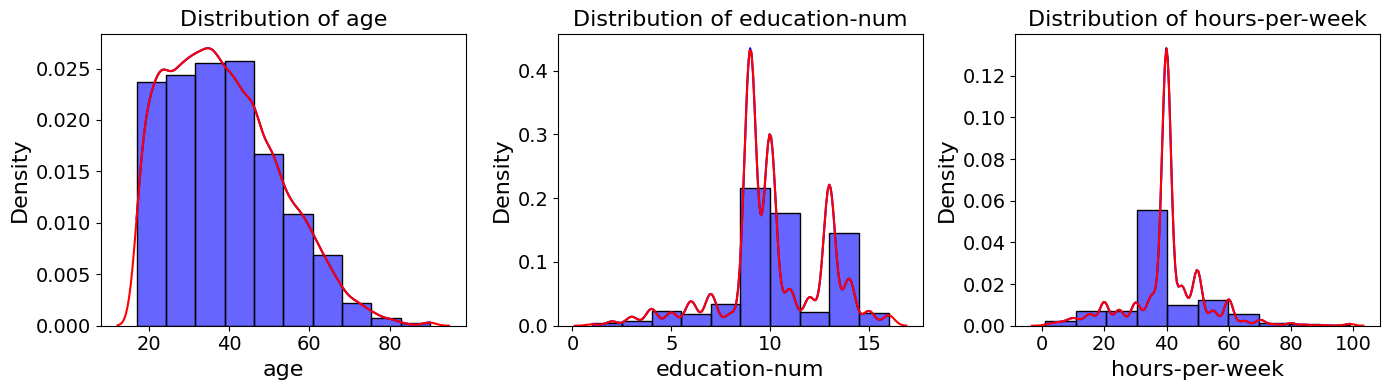

In [28]:
vars_of_interest = [
    "age",
    # "fnlwgt",
    "education-num",
    "hours-per-week",
    # "capital-gain",
    # "capital-loss",
]

kde_distributions(
    df=df,
    kde=True,
    n_rows=1,
    n_cols=3,
    grid_figsize=(14, 4),  # Size of the overall grid figure
    single_figsize=(4, 4),  # Size of individual figures
    fill=True,
    fill_alpha=0.6,
    w_pad=1,
    h_pad=1,
    text_wrap=50,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    image_filename="kde_density_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    single_var_image_filename="kde_density_single_distribution",
    y_axis_label="Density",
    bins=10,
    plot_type="hist",
    stat="Density",
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
)

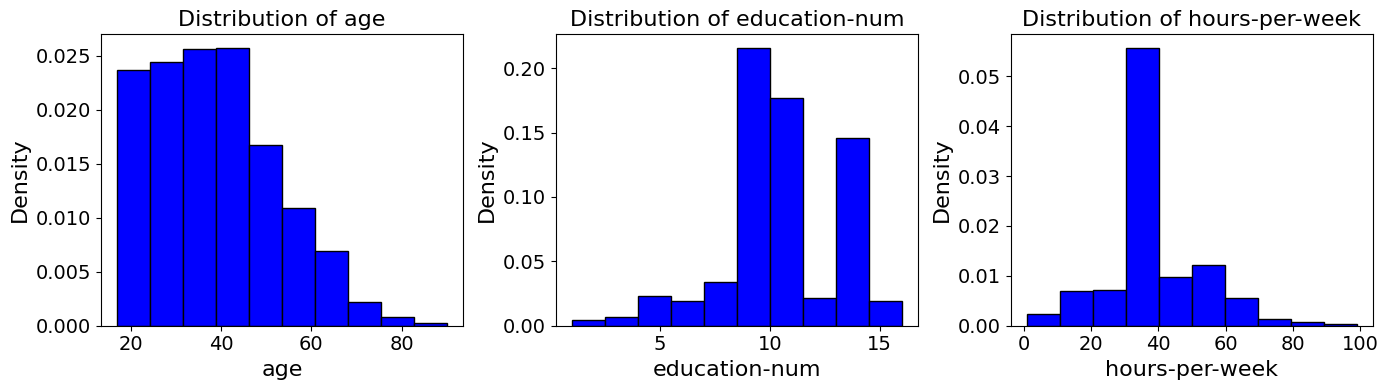

In [29]:
vars_of_interest = [
    "age",
    # "fnlwgt",
    "education-num",
    "hours-per-week",
    # "capital-gain",
    # "capital-loss",
]

kde_distributions(
    df=df,
    kde=False,
    n_rows=1,
    n_cols=3,
    grid_figsize=(14, 4),  # Size of the overall grid figure
    single_figsize=(4, 4),  # Size of individual figures
    w_pad=1,
    h_pad=1,
    text_wrap=50,
    # fill_alpha=1,
    # hist_color="orange",
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    image_filename="density_hist_density_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    single_var_image_filename="kde_density_single_distribution",
    y_axis_label="Density",
    bins=10,
    plot_type="hist",
    stat="Density",
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
)

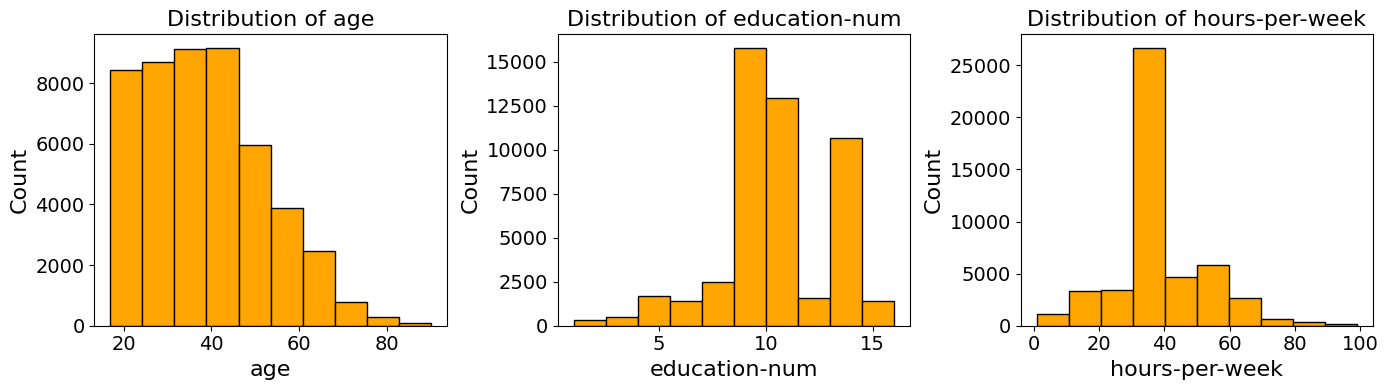

In [30]:
vars_of_interest = [
    "age",
    # "fnlwgt",
    "education-num",
    "hours-per-week",
    # "capital-gain",
    # "capital-loss",
]

kde_distributions(
    df=df,
    kde=False,
    n_rows=1,
    n_cols=3,
    grid_figsize=(14, 4),  # Size of the overall grid figure
    single_figsize=(4, 4),  # Size of individual figures
    w_pad=1,
    h_pad=1,
    text_wrap=50,
    # fill_alpha=1,
    hist_color="orange",
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    image_filename="count_hist_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    single_var_image_filename="kde_density_single_distribution",
    y_axis_label="Count",
    bins=10,
    plot_type="hist",
    stat="Count",
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
)

In [31]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
census_id,,,,,,,,,,,,,,,,
71841434,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39
46506962,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50-59
92306006,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39
18765207,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-59
87688857,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42453818,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,30-39
84101656,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,60-69
90260924,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,30-39


In [44]:
df[df["income"] == "<=50K."]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
census_id,,,,,,,,,,,,,,,,
14656496,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,18-29
66773523,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,30-39
60348779,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,18-29
96340950,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,30-39
58990447,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51100995,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.,30-39
42453818,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,30-39
84101656,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,60-69


In [57]:
df["income"] = df["income"].replace({"<=50K.": "<=50K", ">50K.": ">50K"})

In [58]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [35]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
census_id,,,,,,,,,,,,,,,,
71841434,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39
46506962,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50-59
92306006,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39
18765207,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-59
87688857,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42453818,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,30-39
84101656,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,60-69
90260924,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,30-39


In [60]:
from eda_toolkit import stacked_crosstab_plot

In [104]:
from eda_toolkit import plot_filtered_dataframes

In [82]:
# def stacked_crosstab_plot(
#     df,
#     col,
#     func_col,
#     legend_labels_list,
#     title,
#     kind="bar",
#     width=0.9,
#     rot=0,
#     custom_order=None,
#     image_path_png=None,
#     image_path_svg=None,
#     save_formats=None,
#     color=None,
#     output="both",
#     return_dict=False,
#     x=None,
#     y=None,
#     p=None,
#     file_prefix=None,
#     logscale=False,
#     plot_type="both",  # New parameter for plot type
#     show_legend=True,
#     label_fontsize=12,  # New parameter for controlling x and y axis fontsize
#     tick_fontsize=10,  # New parameter for controlling tick label fontsize
# ):
#     """
#     Generates stacked bar plots and crosstabs for specified columns.

#     Parameters:
#     - df (DataFrame): The pandas DataFrame containing the data.
#     - col (str): The name of the column in the DataFrame to be analyzed.
#     - func_col (list): List of ground truth columns to be analyzed.
#     - legend_labels_list (list): List of legend labels for ea. ground truth col.
#     - title (list): List of titles for the plots.
#     - kind (str, optional): The kind of plot to generate (e.g., 'bar', 'barh').
#       Defaults to 'bar'.
#     - width (float, optional): The width of the bars in the bar plot.
#       Defaults to 0.9.
#     - rot (int, optional): The rotation angle of the x-axis labels.
#       Defaults to 0.
#     - custom_order (list, optional): Specifies a custom order for the categories
#       in the 'col'.
#     - image_path_png (str, optional): Directory path where generated PNG plot
#       images will be saved.
#     - image_path_svg (str, optional): Directory path where generated SVG plot
#       image will be saved.
#     - save_formats (list, optional): List of file formats to save plot images in.
#     - color (list, optional): List of colors to use for the plots. If not
#       provided, a default color scheme is used.
#     - output (str, optional): Specify the output type: "plots_only",
#       "crosstabs_only", or "both". Defaults to "both".
#     - return_dict (bool, optional): Specify whether to return the crosstabs
#       dictionary. Defaults to False.
#     - x (int, optional): The width of the figure.
#     - y (int, optional): The height of the figure.
#     - p (int, optional): The padding between the subplots.
#     - file_prefix (str, optional): Prefix for filename when output includes plots.
#     - logscale (bool, optional): Apply log scale to the y-axis. Defaults to False.
#     - plot_type (str, optional): Specify the type of plot to generate:
#       "both", "regular", "normalized". Defaults to "both".
#     - show_legend (bool, optional): Specify whether to show the legend.
#       Defaults to True.
#     - label_fontsize (int, optional): Fontsize control for x and y axis labels.
#       Defaults to 12.
#     - tick_fontsize (int, optional): Fontsize control for tick labels on the axes.
#       Defaults to 10.

#     Returns:
#     - crosstabs_dict (dict): Dictionary of crosstabs DataFrames if return_dict
#       is True.
#     - None: If return_dict is False.
#     """

#     # Check if the output parameter is valid
#     valid_outputs = ["both", "plots_only", "crosstabs_only"]
#     if output not in valid_outputs:
#         raise ValueError(
#             f"Invalid output type: {output}. Valid options are {valid_outputs}"
#         )

#     # Check if the plot_type parameter is valid
#     valid_plot_types = ["both", "regular", "normalized"]
#     if plot_type not in valid_plot_types:
#         raise ValueError(
#             f"Invalid plot type: {plot_type}. Valid options are {valid_plot_types}"
#         )

#     # Initialize the dictionary to store crosstabs
#     crosstabs_dict = {}
#     # Default color settings
#     if color is None:
#         color = ["#00BFC4", "#F8766D"]  # Default colors

#     # Check if all required columns are present in the DataFrame
#     missing_cols = [
#         col_name for col_name in [col] + func_col if col_name not in df.columns
#     ]
#     if missing_cols:
#         raise KeyError(f"Columns missing in DataFrame: {missing_cols}")

#     # Check if the lengths of title, func_col, and legend_labels_list match
#     if not (len(title) == len(func_col) == len(legend_labels_list)):
#         raise ValueError(
#             "Length mismatch: Ensure that the lengths of title, "
#             "func_col, and legend_labels_list are equal. Check for "
#             "missing items or commas."
#         )

#     # Work on a copy of the DataFrame to avoid modifying the original
#     df_copy = df.copy()

#     # Setting custom order if provided
#     if custom_order:
#         df_copy[col] = pd.Categorical(
#             df_copy[col], categories=custom_order, ordered=True
#         )
#         df_copy.sort_values(by=col, inplace=True)

#     # Generate plots if output is "both" or "plots_only"
#     if output in ["both", "plots_only"]:
#         if file_prefix is None:
#             raise ValueError(
#                 "file_prefix must be provided when output " "includes plots"
#             )
#         # Set default values for x, y, and p if not provided
#         if x is None:
#             x = 12
#         if y is None:
#             y = 8
#         if p is None:
#             p = 10

#         # Determine the number of subplots based on the plot_type parameter
#         if plot_type == "both":
#             nrows = 2
#         else:
#             nrows = 1

#         # Loop through each condition and create the plots
#         for truth, legend, tit in zip(func_col, legend_labels_list, title):
#             if image_path_png and image_path_svg:
#                 func_col_filename_png = os.path.join(
#                     image_path_png, f"{file_prefix}_{truth}.png"
#                 )
#                 func_col_filename_svg = os.path.join(
#                     image_path_svg, f"{file_prefix}_{truth}.svg"
#                 )
#                 image_path = {
#                     "png": func_col_filename_png,
#                     "svg": func_col_filename_svg,
#                 }
#             else:
#                 image_path = {}

#             # Verify the DataFrame state before creating plots
#             fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(x, y))
#             fig.tight_layout(w_pad=5, pad=p, h_pad=5)

#             # Define crosstabdest to avoid UnboundLocalError
#             crosstabdest = pd.crosstab(df_copy[col], df_copy[truth])
#             try:
#                 crosstabdest.columns = legend  # Rename cols
#             except ValueError:
#                 raise ValueError(
#                     f"Length mismatch: Crosstab columns "
#                     f"({len(crosstabdest.columns)}) and legend "
#                     f"({len(legend)}). Check the length of your "
#                     "legend_labels_list, func_col, and title to "
#                     "ensure consistency."
#                 )

#             if plot_type in ["both", "regular"]:
#                 # Plot the first graph (absolute counts)
#                 title1 = f"Prevalence of {tit} by {col.replace('_', ' ').title()}"
#                 xlabel1 = f"{col.replace('_', ' ')}"
#                 ylabel1 = "Count"

#                 # Insert label switching for horizontal bar plot
#                 if kind == "barh":
#                     xlabel1, ylabel1 = ylabel1, xlabel1

#                 crosstabdest.plot(
#                     kind=kind,
#                     stacked=True,
#                     title=title1,
#                     ax=axes[0] if plot_type == "both" else axes,
#                     color=color,
#                     width=width,
#                     rot=rot,
#                     fontsize=12,
#                     logy=logscale,  # Apply log scale if logscale is True
#                 )
#                 ax0 = axes[0] if plot_type == "both" else axes
#                 ax0.set_title(title1, fontsize=label_fontsize)
#                 ax0.set_xlabel(xlabel1, fontsize=label_fontsize)
#                 ax0.set_ylabel(ylabel1, fontsize=label_fontsize)
#                 # Set tick fontsize
#                 ax0.tick_params(axis="both", labelsize=tick_fontsize)

#                 if show_legend:
#                     ax0.legend(legend, fontsize=12)
#                 else:
#                     ax0.legend().remove()

#             if plot_type in ["both", "normalized"]:
#                 # Plotting the second, normalized stacked bar graph
#                 title2 = (
#                     f"Prevalence of {tit} by "
#                     f"{col.replace('_', ' ').title()} (Normalized)"
#                 )
#                 xlabel2 = f"{col.replace('_', ' ')}"
#                 ylabel2 = "Percentage"

#                 # Insert label switching for horizontal bar plot
#                 if kind == "barh":
#                     xlabel2, ylabel2 = ylabel2, xlabel2

#                 crosstabdestnorm = crosstabdest.div(crosstabdest.sum(1), axis=0)
#                 crosstabdestnorm.plot(
#                     kind=kind,
#                     stacked=True,
#                     title=title2,
#                     ylabel="Percentage",
#                     ax=axes[1] if plot_type == "both" else axes,
#                     color=color,
#                     width=width,
#                     rot=rot,
#                     fontsize=12,
#                     logy=logscale,  # Apply log scale if logscale is True
#                 )
#                 ax1 = axes[1] if plot_type == "both" else axes
#                 ax1.set_title(label=title2, fontsize=label_fontsize)
#                 ax1.set_xlabel(xlabel2, fontsize=label_fontsize)
#                 ax1.set_ylabel(ylabel2, fontsize=label_fontsize)
#                 # Set tick fontsize
#                 ax1.tick_params(axis="both", labelsize=tick_fontsize)

#                 if show_legend:
#                     ax1.legend(legend, fontsize=12)
#                 else:
#                     ax1.legend().remove()

#             fig.align_ylabels()
#             if save_formats and isinstance(image_path, dict):
#                 for save_format in save_formats:
#                     if save_format in image_path:
#                         full_path = image_path[save_format]
#                         plt.savefig(full_path, bbox_inches="tight")
#             plt.show()
#             plt.close(fig)  # Ensure plot is closed after showing

#     # Generate crosstabs if output is "both" or "crosstabs_only"
#     if output in ["both", "crosstabs_only"]:
#         legend_counter = 0
#         # First run of the crosstab, accounting for totals only
#         for col_results in func_col:
#             crosstab_df = pd.crosstab(
#                 df_copy[col],
#                 df_copy[col_results],
#                 margins=True,
#                 margins_name="Total",
#             )
#             # Rename columns
#             crosstab_df.rename(
#                 columns={
#                     **{
#                         col: legend_labels_list[legend_counter][i]
#                         for i, col in enumerate(crosstab_df.columns)
#                         if col != "Total"
#                     },
#                     "Total": "Total",
#                 },
#                 inplace=True,
#             )
#             # Re-do the crosstab, this time, accounting for normalized data
#             crosstab_df_norm = pd.crosstab(
#                 df_copy[col],
#                 df_copy[col_results],
#                 normalize="index",
#                 margins=True,
#                 margins_name="Total",
#             )
#             crosstab_df_norm = crosstab_df_norm.mul(100).round(2)
#             crosstab_df_norm.rename(
#                 columns={
#                     **{
#                         col: f"{legend_labels_list[legend_counter][i]}_%"
#                         for i, col in enumerate(crosstab_df_norm.columns)
#                         if col != "Total"
#                     },
#                     "Total": "Total_%",
#                 },
#                 inplace=True,
#             )
#             crosstab_df = pd.concat([crosstab_df, crosstab_df_norm], axis=1)
#             # Process counter
#             legend_counter += 1
#             # Display results
#             print("Crosstab for " + col_results)
#             display(crosstab_df)
#             # Store the crosstab in the dictionary
#             # Use col_results as the key
#             crosstabs_dict[col_results] = crosstab_df

#     # Return the crosstabs_dict only if return_dict is True
#     if return_dict:
#         return crosstabs_dict

In [169]:
def stacked_crosstab_plot(
    df,
    col,
    func_col,
    legend_labels_list,
    title,
    kind="bar",
    width=0.9,
    rot=0,
    custom_order=None,
    image_path_png=None,
    image_path_svg=None,
    save_formats=None,
    color=None,
    output="both",
    return_dict=False,
    x=None,
    y=None,
    p=None,
    file_prefix=None,
    logscale=False,
    plot_type="both",
    show_legend=True,
    label_fontsize=12,
    tick_fontsize=10,
    remove_stacks=False,
):
    """
    Generates stacked or regular bar plots and crosstabs for specified columns.

    This function allows users to create stacked bar plots (or regular bar plots
    if stacks are removed) and corresponding crosstabs for specific columns
    in a DataFrame. It provides options to customize the appearance, including
    font sizes for axis labels and tick labels, and to choose between regular
    or normalized plots.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.

    col : str
        The name of the column in the DataFrame to be analyzed.

    func_col : list
        List of ground truth columns to be analyzed.

    legend_labels_list : list
        List of legend labels for each ground truth column.

    title : list
        List of titles for the plots.

    kind : str, optional (default='bar')
        The kind of plot to generate ('bar' or 'barh' for horizontal bars).

    width : float, optional (default=0.9)
        The width of the bars in the bar plot.

    rot : int, optional (default=0)
        The rotation angle of the x-axis labels.

    custom_order : list, optional
        Specifies a custom order for the categories in the `col`.

    image_path_png : str, optional
        Directory path where generated PNG plot images will be saved.

    image_path_svg : str, optional
        Directory path where generated SVG plot images will be saved.

    save_formats : list, optional
        List of file formats to save the plot images in.

    color : list, optional
        List of colors to use for the plots. If not provided, a default
        color scheme is used.

    output : str, optional (default='both')
        Specify the output type: "plots_only", "crosstabs_only", or "both".

    return_dict : bool, optional (default=False)
        Specify whether to return the crosstabs dictionary.

    x : int, optional
        The width of the figure.

    y : int, optional
        The height of the figure.

    p : int, optional
        The padding between the subplots.

    file_prefix : str, optional
        Prefix for the filename when output includes plots.

    logscale : bool, optional (default=False)
        Apply log scale to the y-axis.

    plot_type : str, optional (default='both')
        Specify the type of plot to generate: "both", "regular", "normalized".

    show_legend : bool, optional (default=True)
        Specify whether to show the legend.

    label_fontsize : int, optional (default=12)
        Font size for axis labels.

    tick_fontsize : int, optional (default=10)
        Font size for tick labels on the axes.

    remove_stacks : bool, optional (default=False)
        If True, removes stacks and creates a regular bar plot using only
        the `col` parameter. Only works when `plot_type` is set to 'regular'.

    Returns:
    --------
    crosstabs_dict : dict
        Dictionary of crosstabs DataFrames if `return_dict` is True.

    None
        If `return_dict` is False.
    """

    # Check if remove_stacks is used correctly
    if remove_stacks and plot_type != "regular":
        raise ValueError(
            "remove_stacks can only be used when plot_type is set to 'regular'."
        )

    # Check if the output parameter is valid
    valid_outputs = ["both", "plots_only", "crosstabs_only"]
    if output not in valid_outputs:
        raise ValueError(
            f"Invalid output type: {output}. Valid options are {valid_outputs}"
        )

    # Check if the plot_type parameter is valid
    valid_plot_types = ["both", "regular", "normalized"]
    if plot_type not in valid_plot_types:
        raise ValueError(
            f"Invalid plot type: {plot_type}. Valid options are {valid_plot_types}"
        )

    # Initialize the dictionary to store crosstabs
    crosstabs_dict = {}
    # Default color settings
    if color is None:
        color = ["#00BFC4", "#F8766D"]  # Default colors

    # Check if all required columns are present in the DataFrame
    missing_cols = [
        col_name for col_name in [col] + func_col if col_name not in df.columns
    ]
    if missing_cols:
        raise KeyError(f"Columns missing in DataFrame: {missing_cols}")

    # Check if the lengths of title, func_col, and legend_labels_list match
    if not (len(title) == len(func_col) == len(legend_labels_list)):
        raise ValueError(
            "Length mismatch: Ensure that the lengths of title, func_col, "
            "and legend_labels_list are equal. Check for missing items or commas."
        )

    # Work on a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Setting custom order if provided
    if custom_order:
        df_copy[col] = pd.Categorical(
            df_copy[col], categories=custom_order, ordered=True
        )
        df_copy.sort_values(by=col, inplace=True)

    # Generate plots if output is "both" or "plots_only"
    if output in ["both", "plots_only"]:
        if file_prefix is None:
            raise ValueError(
                "file_prefix must be provided when output " "includes plots"
            )

        # Set default values for x, y, and p if not provided
        if x is None:
            x = 12
        if y is None:
            y = 8
        if p is None:
            p = 10

        # Determine the number of subplots based on the plot_type parameter
        if plot_type == "both":
            nrows = 2
        else:
            nrows = 1

        # Loop through each condition and create the plots
        for truth, legend, tit in zip(func_col, legend_labels_list, title):
            if image_path_png and image_path_svg:
                func_col_filename_png = os.path.join(
                    image_path_png, f"{file_prefix}_{truth}.png"
                )
                func_col_filename_svg = os.path.join(
                    image_path_svg, f"{file_prefix}_{truth}.svg"
                )
                image_path = {
                    "png": func_col_filename_png,
                    "svg": func_col_filename_svg,
                }
            else:
                image_path = {}

            # Verify the DataFrame state before creating plots
            fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(x, y))
            fig.tight_layout(w_pad=5, pad=p, h_pad=5)

            if remove_stacks:
                # Create a regular bar plot using only the `col` parameter
                counts = df_copy[col].value_counts()
                title1 = f"Distribution of {col.replace('_', ' ').title()}"
                xlabel1 = f"{col.replace('_', ' ')}"
                ylabel1 = "Count"
                counts.plot(
                    kind=kind,
                    ax=axes[0] if plot_type == "both" else axes,
                    color=color[0],
                    width=width,
                    rot=rot,
                    fontsize=12,
                    logy=logscale,  # Apply log scale if logscale is True
                )
                ax0 = axes[0] if plot_type == "both" else axes

                if kind == "barh":
                    ax0.set_xlabel(ylabel1, fontsize=label_fontsize)
                    ax0.set_ylabel(xlabel1, fontsize=label_fontsize)
                else:
                    ax0.set_xlabel(xlabel1, fontsize=label_fontsize)
                    ax0.set_ylabel(ylabel1, fontsize=label_fontsize)

                ax0.set_title(title1, fontsize=label_fontsize)
                ax0.tick_params(axis="both", labelsize=tick_fontsize)

                if show_legend:
                    ax0.legend([col], fontsize=12)
                else:
                    ax0.legend().remove()

            else:
                # Define crosstabdest to avoid UnboundLocalError
                crosstabdest = pd.crosstab(df_copy[col], df_copy[truth])
                try:
                    crosstabdest.columns = legend  # Rename columns
                except ValueError:
                    raise ValueError(
                        f"Length mismatch: Crosstab columns "
                        f"({len(crosstabdest.columns)}) and legend "
                        f"({len(legend)}). Check the length of your "
                        "legend_labels_list, func_col, and title to ensure "
                        "you are not missing an item, comma, or have an extra "
                        "item."
                    )

                if plot_type in ["both", "regular"]:
                    # Plot the first graph (absolute counts)
                    title1 = f"Prevalence of {tit} by {col.replace('_', ' ').title()}"
                    xlabel1 = f"{col.replace('_', ' ')}"
                    ylabel1 = "Count"
                    crosstabdest.plot(
                        kind=kind,
                        stacked=True,
                        title=title1,
                        ax=axes[0] if plot_type == "both" else axes,
                        color=color,
                        width=width,
                        rot=rot,
                        fontsize=12,
                        logy=logscale,  # Apply log scale if logscale is True
                    )
                    ax0 = axes[0] if plot_type == "both" else axes

                    if kind == "barh":
                        ax0.set_xlabel(ylabel1, fontsize=label_fontsize)
                        ax0.set_ylabel(xlabel1, fontsize=label_fontsize)
                    else:
                        ax0.set_xlabel(xlabel1, fontsize=label_fontsize)
                        ax0.set_ylabel(ylabel1, fontsize=label_fontsize)

                    # Set tick fontsize
                    ax0.tick_params(axis="both", labelsize=tick_fontsize)

                    if show_legend:
                        ax0.legend(legend, fontsize=12)
                    else:
                        ax0.legend().remove()

                if plot_type in ["both", "normalized"]:
                    # Plotting the second, normalized stacked bar graph
                    title2 = (
                        f"Prevalence of {tit} by {col.replace('_', ' ').title()} "
                        f"(Normalized)"
                    )
                    xlabel2 = f"{col.replace('_', ' ')}"
                    ylabel2 = "Percentage"
                    crosstabdestnorm = crosstabdest.div(
                        crosstabdest.sum(1),
                        axis=0,
                    )
                    crosstabdestnorm.plot(
                        kind=kind,
                        stacked=True,
                        title=title2,
                        ylabel="Percentage",
                        ax=axes[1] if plot_type == "both" else axes,
                        color=color,
                        width=width,
                        rot=rot,
                        fontsize=12,
                        logy=logscale,  # Apply log scale if logscale is True
                    )
                    ax1 = axes[1] if plot_type == "both" else axes

                    if kind == "barh":
                        ax1.set_xlabel(ylabel2, fontsize=label_fontsize)
                        ax1.set_ylabel(xlabel2, fontsize=label_fontsize)
                    else:
                        ax1.set_xlabel(xlabel2, fontsize=label_fontsize)
                        ax1.set_ylabel(ylabel2, fontsize=label_fontsize)

                    # Set tick fontsize
                    ax1.tick_params(axis="both", labelsize=tick_fontsize)

                    if show_legend:
                        ax1.legend(legend, fontsize=12)
                    else:
                        ax1.legend().remove()

            fig.align_ylabels()
            if save_formats and isinstance(image_path, dict):
                for save_format in save_formats:
                    if save_format in image_path:
                        full_path = image_path[save_format]
                        plt.savefig(full_path, bbox_inches="tight")
            plt.show()
            plt.close(fig)  # Ensure plot is closed after showing

    # Generate crosstabs if output is "both" or "crosstabs_only"
    if output in ["both", "crosstabs_only"]:
        legend_counter = 0
        # First run of the crosstab, accounting for totals only
        for col_results in func_col:
            crosstab_df = pd.crosstab(
                df_copy[col],
                df_copy[col_results],
                margins=True,
                margins_name="Total",
            )
            # Rename columns
            crosstab_df.rename(
                columns={
                    **{
                        col: legend_labels_list[legend_counter][i]
                        for i, col in enumerate(crosstab_df.columns)
                        if col != "Total"
                    },
                    "Total": "Total",
                },
                inplace=True,
            )
            # Re-do the crosstab, this time, accounting for normalized data
            crosstab_df_norm = pd.crosstab(
                df_copy[col],
                df_copy[col_results],
                normalize="index",
                margins=True,
                margins_name="Total",
            )
            crosstab_df_norm = crosstab_df_norm.mul(100).round(2)
            crosstab_df_norm.rename(
                columns={
                    **{
                        col: f"{legend_labels_list[legend_counter][i]}_%"
                        for i, col in enumerate(crosstab_df_norm.columns)
                        if col != "Total"
                    },
                    "Total": "Total_%",
                },
                inplace=True,
            )
            crosstab_df = pd.concat([crosstab_df, crosstab_df_norm], axis=1)
            # Process counter
            legend_counter += 1
            # Display results
            print("Crosstab for " + col_results)
            display(crosstab_df)
            # Store the crosstab in the dictionary
            # Use col_results as the key
            crosstabs_dict[col_results] = crosstab_df  

    # Return the crosstabs_dict only if return_dict is True
    if return_dict:
        return crosstabs_dict

In [165]:
# Define the func_col to use in the loop
func_col = ["sex", "income"]


# Define the legend_labels to use in the loop
legend_labels_list = [
    ["Male", "Female"],
    ["<=50K", ">50K"],
]


# Define titles for the plots
title = [
    "Sex",
    "Income",
]

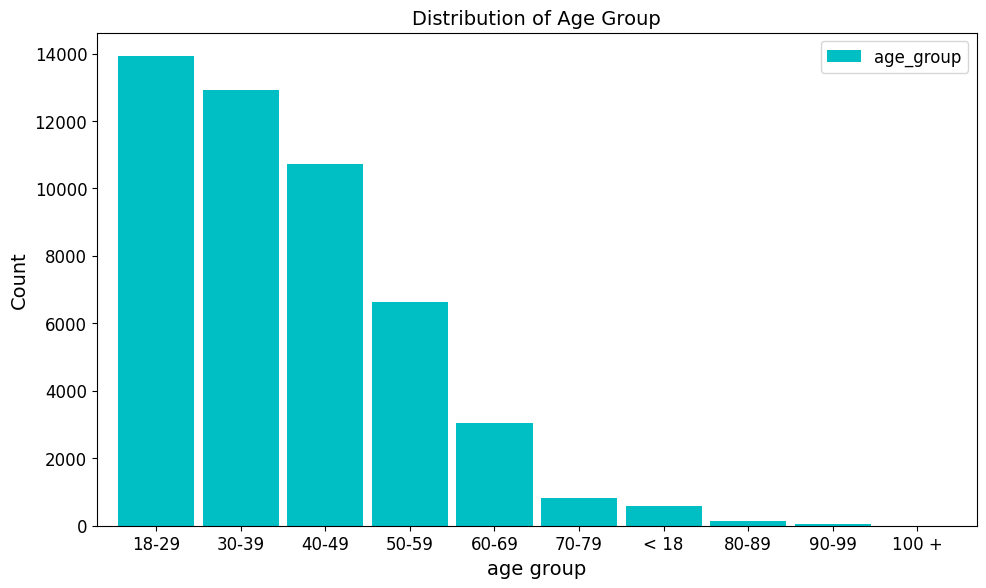

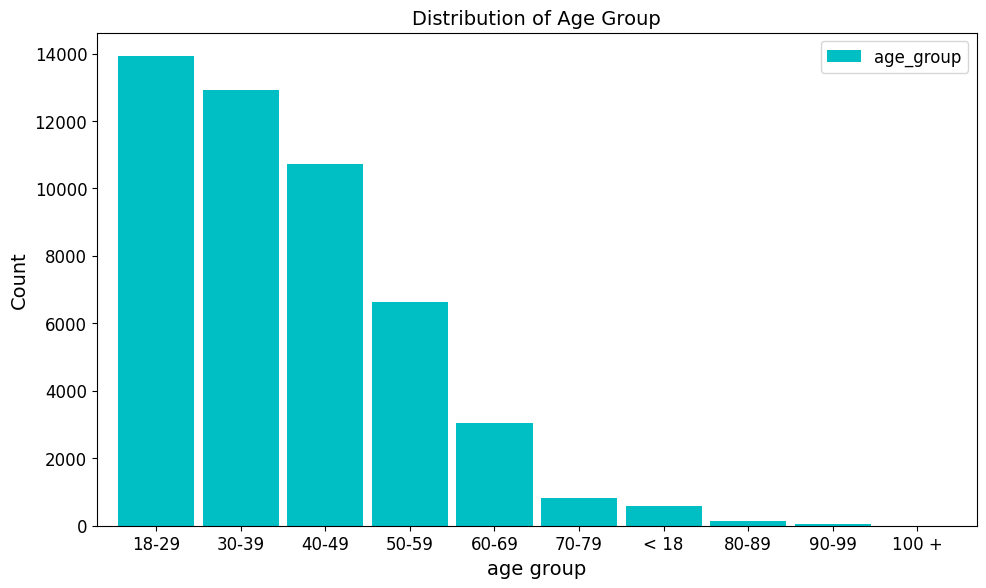

Crosstab for sex


sex,Male,Female,Total,Male_%,Female_%
age_group,,,,,
< 18,295,300,595,49.58,50.42
18-29,5707,8213,13920,41.00,59.00
30-39,3853,9076,12929,29.80,70.20
40-49,3188,7536,10724,29.73,70.27
50-59,1873,4746,6619,28.30,71.70
60-69,939,2115,3054,30.75,69.25
70-79,280,535,815,34.36,65.64
80-89,40,91,131,30.53,69.47
90-99,17,38,55,30.91,69.09


Crosstab for income


income,<=50K,>50K,Total,<=50K_%,>50K_%
age_group,,,,,
< 18,595,0,595,100.00,0.00
18-29,13174,746,13920,94.64,5.36
30-39,9468,3461,12929,73.23,26.77
40-49,6738,3986,10724,62.83,37.17
50-59,4110,2509,6619,62.09,37.91
60-69,2245,809,3054,73.51,26.49
70-79,668,147,815,81.96,18.04
80-89,115,16,131,87.79,12.21
90-99,42,13,55,76.36,23.64


In [166]:
crosstabs_dict = stacked_crosstab_plot(
    x=12,
    y=8,
    p=10,
    df=df,
    col="age_group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    file_prefix="Stacked_Bar_Age",  # Prefix for the filename
    kind="bar",
    width=0.9,
    rot=0,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_formats=["png", "svg"],
    # color=["#00BFC4", "#F8766D", "#FFCCCC", "#FF6666", "#CC0000", "#660000"],
    output="both",  # Change this to "plots_only", "crosstabs_only", or "both"
    return_dict=True,  # Do not return the dictionary
    label_fontsize=14,  # New parameter for controlling x and y axis fontsize
    tick_fontsize=12,  # New parameter for controlling tick label fontsize
    plot_type="regular",
    remove_stacks=True,
)

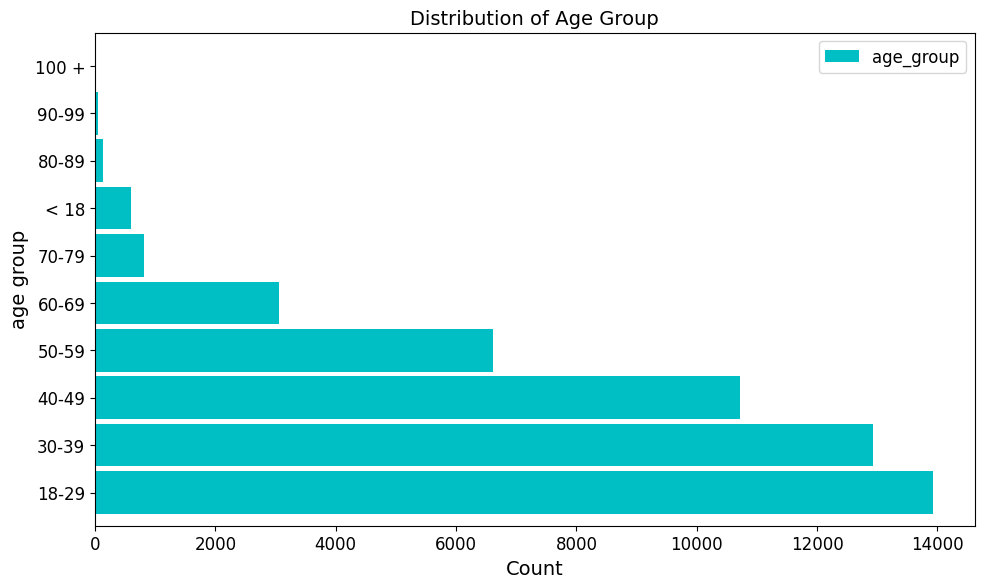

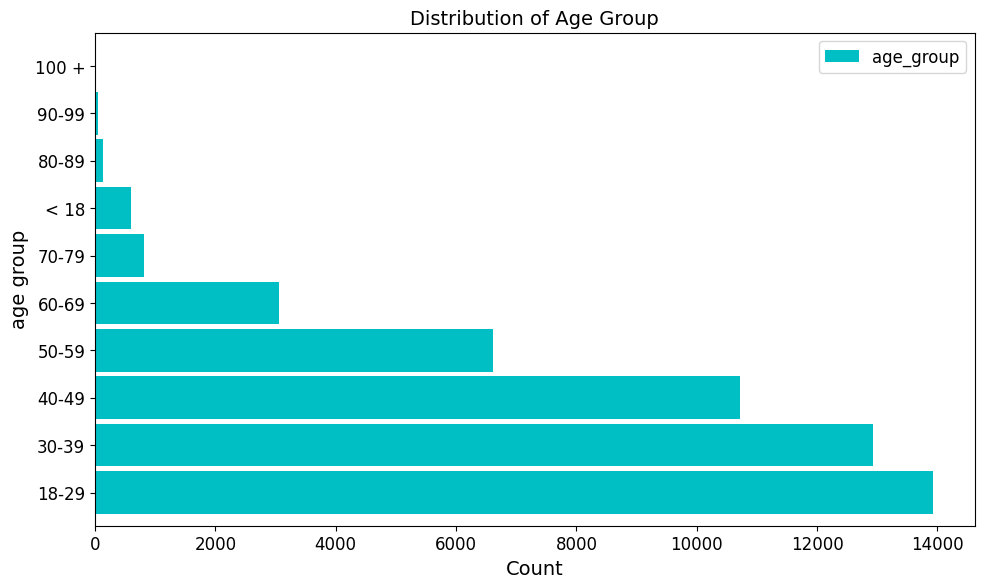

Crosstab for sex


sex,Male,Female,Total,Male_%,Female_%
age_group,,,,,
< 18,295,300,595,49.58,50.42
18-29,5707,8213,13920,41.00,59.00
30-39,3853,9076,12929,29.80,70.20
40-49,3188,7536,10724,29.73,70.27
50-59,1873,4746,6619,28.30,71.70
60-69,939,2115,3054,30.75,69.25
70-79,280,535,815,34.36,65.64
80-89,40,91,131,30.53,69.47
90-99,17,38,55,30.91,69.09


Crosstab for income


income,<=50K,>50K,Total,<=50K_%,>50K_%
age_group,,,,,
< 18,595,0,595,100.00,0.00
18-29,13174,746,13920,94.64,5.36
30-39,9468,3461,12929,73.23,26.77
40-49,6738,3986,10724,62.83,37.17
50-59,4110,2509,6619,62.09,37.91
60-69,2245,809,3054,73.51,26.49
70-79,668,147,815,81.96,18.04
80-89,115,16,131,87.79,12.21
90-99,42,13,55,76.36,23.64


In [168]:
crosstabs_dict = stacked_crosstab_plot(
    x=12,
    y=8,
    p=10,
    df=df,
    col="age_group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    file_prefix="Stacked_Bar_Age",  # Prefix for the filename
    plot_type="regular",
    kind="barh",
    width=0.9,
    rot=0,
    # image_path_png=image_path_png,
    # image_path_svg=image_path_svg,
    save_formats=["png", "svg"],
    color=["#00BFC4", "#F8766D", "#FFCCCC", "#FF6666", "#CC0000", "#660000"],
    # color=["#660000"],
    output="both",  # Change this to "plots_only", "crosstabs_only", or "both"
    return_dict=True,  # Do not return the dictionary
    label_fontsize=14,  # New parameter for controlling x and y axis fontsize
    tick_fontsize=12,  # New parameter for controlling tick label fontsize
    remove_stacks=True,
)

In [95]:
crosstab_age_sex = crosstabs_dict["sex"]
crosstab_age_income = crosstabs_dict["income"]

In [ ]:
crosstabs_dict = stacked_crosstab_plot(
    x=12,
    y=8,
    p=10,
    df=df,
    col="age_group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    file_prefix="Stacked_Bar_Age",  # Prefix for the filename
    kind="barh",
    width=0.9,
    rot=0,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_formats=["png", "svg"],
    # color=["#00BFC4", "#F8766D", "#FFCCCC", "#FF6666", "#CC0000", "#660000"],
    output="both",  # Change this to "plots_only", "crosstabs_only", or "both"
    return_dict=True,  # Do not return the dictionary
    label_fontsize=14,  # New parameter for controlling x and y axis fontsize
    tick_fontsize=12,  # New parameter for controlling tick label fontsize
)

In [110]:
def plot_filtered_dataframes(
    df,
    col,
    func_col,
    legend_labels_list,
    title,
    file_prefix,
    condition_col=None,
    condition_val=1,
    x=12,
    y=8,
    p=10,
    kind="bar",
    width=0.9,
    rot=0,
    image_path_png=None,
    image_path_svg=None,
    save_formats=["png", "svg"],
    color=None,
    output="both",
    return_dict=True,
    logscale=True,
    plot_type="both",
    show_legend=True,
):
    """
    Filters the DataFrame based on a specified condition and generates plots and crosstabs.

    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - col (str): The name of the column in the DataFrame to be analyzed.
    - func_col (list): List of ground truth columns to be analyzed.
    - legend_labels_list (list): List of legend labels for each ground truth column.
    - title (list): List of titles for the plots.
    - file_prefix (str): Prefix for the filename when output includes plots.
    - condition_col (str, optional): Column to skip filtering.
    - condition_val (int, optional): Value to filter the DataFrame on. Defaults to 1.
    - x (int, optional): The width of the figure.
    - y (int, optional): The height of the figure.
    - p (int, optional): The padding between the subplots.
    - kind (str, optional): The kind of plot to generate (e.g., 'bar', 'barh'). Defaults to 'bar'.
    - width (float, optional): The width of the bars in the bar plot. Defaults to 0.9.
    - rot (int, optional): The rotation angle of the x-axis labels. Defaults to 0.
    - image_path_png (str, optional): Directory path where generated PNG plot images will be saved.
    - image_path_svg (str, optional): Directory path where generated SVG plot images will be saved.
    - save_formats (list, optional): List of file formats to save the plot images in.
    - color (list, optional): List of colors to use for the plots. If not provided, a default color scheme is used.
    - output (str, optional): Specify the output type: "plots_only", "crosstabs_only", or "both". Defaults to "both".
    - return_dict (bool, optional): Specify whether to return the crosstabs dictionary. Defaults to True.
    - logscale (bool, optional): Apply log scale to the y-axis. Defaults to True.
    - plot_normalized (bool, optional): Specify whether to plot normalized stacked bar graph. Defaults to True.
    - show_legend (bool, optional): Specify whether to show the legend. Defaults to True.

    Returns:
    - results (list): List of crosstabs dictionaries if return_dict is True.
    - None: If return_dict is False.
    """
    # Initialize results list to store crosstabs
    results = []
    # Loop through each condition and create the filtered DataFrame
    for fc, ll, t in zip(func_col, legend_labels_list, title):
        # Filter the DataFrame based on the condition if condition_col is provided
        if condition_col and fc != condition_col:
            filtered_df = df[df[fc] == condition_val]
        else:
            filtered_df = df
        # Call the main plotting function
        result = stacked_crosstab_plot(
            filtered_df,
            col=col,
            func_col=[fc],
            legend_labels_list=[ll],
            title=[t],
            file_prefix=f"{file_prefix}_{fc}",
            x=x,
            y=y,
            p=p,
            kind=kind,
            width=width,
            rot=rot,
            image_path_png=image_path_png,
            image_path_svg=image_path_svg,
            save_formats=save_formats,
            color=color,
            output=output,
            return_dict=return_dict,
            logscale=logscale,
            plot_type=plot_type,
            show_legend=show_legend,
        )
        # Append results to the list if return_dict is True
        if return_dict:
            results.append(result)

    # Return the results list if return_dict is True
    # if return_dict:
    #     return results

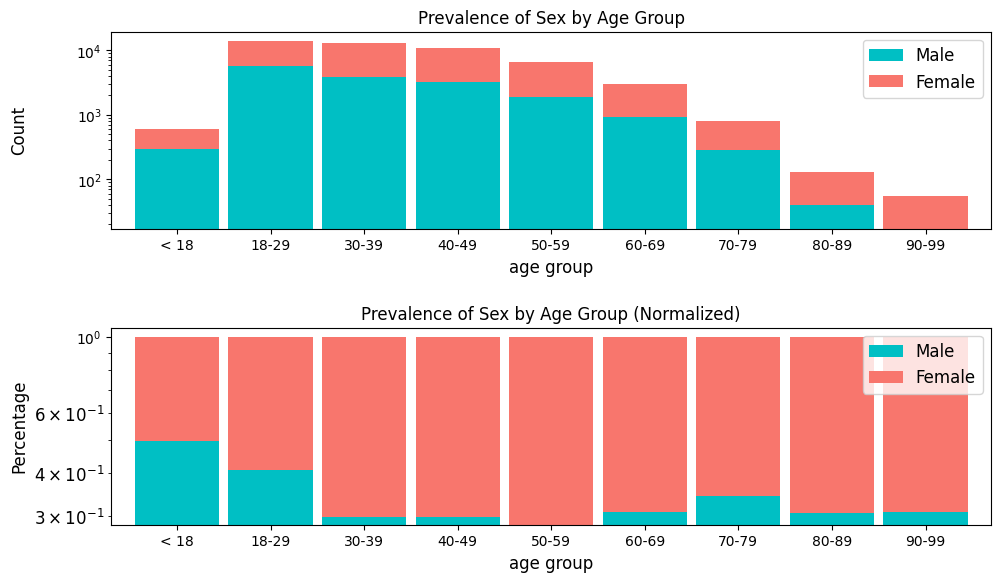

Crosstab for sex


sex,Male,Female,Total,Male_%,Female_%
age_group,,,,,
< 18,295,300,595,49.58,50.42
18-29,5707,8213,13920,41.00,59.00
30-39,3853,9076,12929,29.80,70.20
40-49,3188,7536,10724,29.73,70.27
50-59,1873,4746,6619,28.30,71.70
60-69,939,2115,3054,30.75,69.25
70-79,280,535,815,34.36,65.64
80-89,40,91,131,30.53,69.47
90-99,17,38,55,30.91,69.09


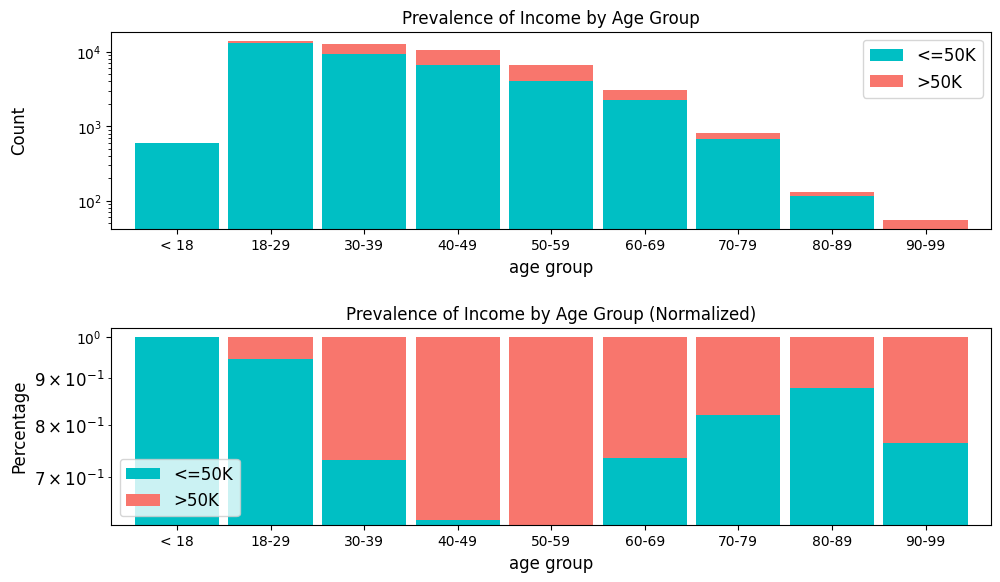

Crosstab for income


income,<=50K,>50K,Total,<=50K_%,>50K_%
age_group,,,,,
< 18,595,0,595,100.00,0.00
18-29,13174,746,13920,94.64,5.36
30-39,9468,3461,12929,73.23,26.77
40-49,6738,3986,10724,62.83,37.17
50-59,4110,2509,6619,62.09,37.91
60-69,2245,809,3054,73.51,26.49
70-79,668,147,815,81.96,18.04
80-89,115,16,131,87.79,12.21
90-99,42,13,55,76.36,23.64


In [111]:
plot_filtered_dataframes(
    df=df,
    col="age_group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    file_prefix="Stacked_Bar_Reg",
    kind="bar",
    # plot_normalized=False,
)

In [39]:
from eda_toolkit import data_types

In [40]:
from eda_toolkit import data_types

In [41]:
def contingency_table(df, cols=None, sort_by=0):
    """
    Function to create a contingency table from one or more columns in a dataframe, with sorting options.

    Args:
        df (dataframe): the dataframe to analyze

        cols (str or list, optional): name of the column (as a string) for a single column
                                      or list of column names for multiple columns.
                                      Must provide at least one column.

        sort_by (int): enter 0 to sort results by cols group
                       enter 1 to sort results by totals descending

    Raises:
        ValueError: if no columns are specified or if sort_by is not 0 or 1

    Returns:
        dataframe: dataframe with specified columns, 'Total', and 'Percentage'
    """
    # Ensure at least one column is specified
    if not cols or (isinstance(cols, list) and not cols):
        raise ValueError("At least one DataFrame column must be specified.")

    # Ensure sort_by is either 0 or 1
    if sort_by not in [0, 1]:
        raise ValueError("sort_by must be 0 or 1.")

    # Convert single column to list
    if isinstance(cols, str):
        cols = [cols]

    # Convert categorical columns to string to avoid fillna issue
    for col in cols:
        if df[col].dtype.name == "category":
            df[col] = df[col].astype(str)

    # Fill NA values in the dataframe
    df = df.fillna("")

    # Create the contingency table with observed=True
    cont_df = (
        df.groupby(cols, observed=True)
        .size()
        .reset_index(
            name="Total",
        )
    )

    # Calculate the percentage
    cont_df["Percentage"] = 100 * cont_df["Total"] / len(df)

    # Sort values based on provided sort_by parameter
    if sort_by == 0:
        cont_df = cont_df.sort_values(by=cols)
    elif sort_by == 1:
        cont_df = cont_df.sort_values(by="Total", ascending=False)

    # Convert categorical columns to string to avoid fillna issue
    cont_df[cols] = cont_df[cols].astype(str)

    # Results for all groups
    all_groups = pd.DataFrame(
        [
            {
                **{col: "" for col in cols},
                "Total": cont_df["Total"].sum(),
                "Percentage": cont_df["Percentage"].sum(),
            }
        ]
    )

    # Combine results
    c_table = pd.concat(
        [cont_df.fillna(""), all_groups.fillna("")],
        ignore_index=True,
    )

    # Update GroupPct to reflect as a percentage rounded to 2 decimal places
    c_table["Percentage"] = c_table["Percentage"].round(2)

    return c_table

In [42]:
from eda_toolkit import contingency_table

In [43]:
new = contingency_table(
    df=df,
    cols=[
        "age_group",
        "workclass",
        "race",
        "sex",
    ],
    sort_by=1,
)

TypeError: contingency_table() got an unexpected keyword argument 'cols'

In [ ]:
print(new)

In [ ]:
from eda_toolkit import summarize_all_combinations

In [ ]:
unique_vars = [
    "age_group",
    "workclass",
    "education",
    "occupation",
    "race",
    "sex",
    "income",
]


summary_tables, all_combinations = summarize_all_combinations(
    df=df,
    data_path=data_output,
    variables=unique_vars,
    data_name="census_summary_tables.xlsx",
)

In [ ]:
all_combinations

In [ ]:
import pandas as pd


def save_dataframes_to_excel(file_path, df_dict, decimal_places=0):
    """
    Save multiple DataFrames to separate sheets in an Excel file with customized
    formatting.

    Parameters:
    ----------
    file_path : str
        Full path to the output Excel file.
    df_dict : dict
        Dictionary where keys are sheet names and values are DataFrames to save.
    decimal_places : int, optional
        Number of decimal places to round numeric columns. Default is 2.

    Notes:
    -----
    - The function will autofit columns and left-align text.
    - Numeric columns will be formatted with the specified number of decimal places.
    - Headers will be bold and left-aligned without borders.
    """

    with pd.ExcelWriter(file_path, engine="xlsxwriter") as writer:
        workbook = writer.book

        # Customize header format (remove borders)
        header_format = workbook.add_format(
            {
                "bold": True,
                "text_wrap": True,
                "valign": "top",
                "border": 0,  # Remove borders
                "align": "left",  # Left align
            }
        )

        # Customize cell format (left align)
        cell_format_left = workbook.add_format({"align": "left"})  # Left align

        # Customize number format based on decimal_places
        if decimal_places == 0:
            number_format_str = "0"
            cell_format_number = workbook.add_format(
                {
                    "align": "left",
                    "num_format": number_format_str,
                }  # Left align  # Number format
            )
        else:
            number_format_str = f"0.{decimal_places * '0'}"
            cell_format_number = workbook.add_format(
                {
                    "align": "left",
                    "num_format": number_format_str,
                }  # Left align  # Number format
            )

        # Write each DataFrame to its respective sheet
        for sheet_name, df in df_dict.items():
            # Round numeric columns to the specified number of decimal places
            df = df.round(decimal_places)
            if decimal_places == 0:
                df = df.apply(
                    lambda x: x.astype(int) if pd.api.types.is_numeric_dtype(x) else x
                )
            df.to_excel(writer, sheet_name=sheet_name, index=False)
            worksheet = writer.sheets[sheet_name]

            # Write header with custom format
            for col_num, value in enumerate(df.columns.values):
                worksheet.write(0, col_num, value, header_format)

            # Auto-fit all columns with added space
            for col_num, col_name in enumerate(df.columns):
                max_length = max(
                    df[col_name].astype(str).map(len).max(),
                    len(col_name),
                )
                # Determine if the column is numeric by dtype
                if pd.api.types.is_numeric_dtype(df[col_name]):
                    worksheet.set_column(
                        col_num, col_num, max_length + 2, cell_format_number
                    )
                else:
                    worksheet.set_column(
                        col_num, col_num, max_length + 2, cell_format_left
                    )

    print(f"DataFrames saved to {file_path}")

In [ ]:
df["age"].min()

In [ ]:
df[(df["age"] > 18) & (df["age"] < 40)]

In [ ]:
file_name = "df_census.xlsx"  # Name of the output Excel file
file_path = os.path.join(data_path, file_name)

# filter DataFrame to Ages 18-40
filtered_df = df[(df["age"] > 18) & (df["age"] < 40)]


df_dict = {
    "original_df": df,
    "ages_18_to_40": filtered_df,
}

save_dataframes_to_excel(
    file_path=file_path,
    df_dict=df_dict,
    decimal_places=0,
)

In [ ]:
df.columns.to_list()

In [ ]:
summarize_all_combinations()

In [ ]:
data_types(df)